In [13]:
import os
import matplotlib.pyplot as plt
import numpy as np

# resultsDir = "AAAAAAAAAAAAAAAAAAAAAAAAA/2020_11_20_23_59_11"
# resultsDir = "AAAAAAAAAAAAAAAAAAAAAAAAA/2020_11_21_15_33_30"
# resultsDir = "AAAAAAAAAAAAAAAAAAAAAAAAA/2020_11_22_15_07_50"
# resultsDir = "AAAAAAAAAAAAAAAAAAAAAAAAA/2020_11_23_22_05_34"
# resultsDir = "AAAAAAAAAAAAAAAAAAAAAAAAA/Elastix mask2020_11_25_01_04_36"
# resultsDir = "AAAAAAAAAAAAAAAAAAAAAAAAA/ElastixNoCurv2020_11_27_20_57_40"
# resultsDir = "AAAAAAAAAAAAAAAAAAAAAAAAA/ElastixNoCurv2020_11_28_16_04_41"
# resultsDir = "AAAAAAAAAAAAAAAAAAAAAAAAA/NoElastixMask2020_11_29_14_53_29"
# resultsDir = "AAAAAAAAAAAAAAAAAAAAAAAAA/_ElastixMask2020_11_29_20_41_48"
# resultsDir = "AAAAAAAAAAAAAAAAAAAAAAAAA/_ElastixMaskNoCurv2020_11_30_00_34_21"

##### lassoTols ##### 
# resultsDir = "AAAAAAAAAAAAAAAAAAAAAAAAA/_5ElastixMask2020_11_30_19_19_33"

# resultsDir = "AAAAAAAAAAAAAAAAAAAAAAAAA/patchTest" # Broken (only one P)

##### Ps ##### 
# resultsDir = "AAAAAAAAAAAAAAAAAAAAAAAAA/patchTest2"

##### Ns ##### 
# resultsDir = "AAAAAAAAAAAAAAAAAAAAAAAAA/NsTest2020_12_06_16_35_43" # bad
# resultsDir = "AAAAAAAAAAAAAAAAAAAAAAAAA/testNs2020_12_07_20_45_27" # 1 atlas
# resultsDir = "AAAAAAAAAAAAAAAAAAAAAAAAA/testNs32020_12_08_20_11_57" # 3 atlases

##### Atlases ##### 
# resultsDir = "AAAAAAAAAAAAAAAAAAAAAAAAA/atlases2020_12_09_18_37_43"
# resultsDir = "AAAAAAAAAAAAAAAAAAAAAAAAA/atlases22020_12_09_21_12_36"
# resultsDir = "AAAAAAAAAAAAAAAAAAAAAAAAA/atlasesFull2020_12_10_19_16_57"

###################################################################################
###################################################################################
###################################################################################

##### lassoTols ##### 

##### lassoTols ##### 
# resultsDir = "AAAAAAAAAAAAAAAAAAAAAAAAA/lassoTo5Fold1Atlas"
# resultsDir = "AAAAAAAAAAAAAAAAAAAAAAAAA/lassoTol5Fold2020_12_17_18_26_39"


##### Ps ##### 
# resultsDir = "AAAAAAAAAAAAAAAAAAAAAAAAA/Ps5Fold2020_12_18_19_08_15"

##### Ns ##### 
# resultsDir = "AAAAAAAAAAAAAAAAAAAAAAAAA/Ns5Fold2020_12_19_17_10_31"

##### Atlases ##### 
#resultsDir = "AAAAAAAAAAAAAAAAAAAAAAAAA/Atlases5Fold2020_12_21_18_56_29"


###################################################################################
###################################################################################
###################################################################################

##### Ns ##### 
# resultsDir = "AAAAAAAAAAAAAAAAAAAAAAAAA/Ns2_5Fold2021_01_15_18_11_56"
# resultsDir = "AAAAAAAAAAAAAAAAAAAAAAAAA/Ns2_noCurv_5Fold2021_01_16_17_15_01"
# resultsDir = "AAAAAAAAAAAAAAAAAAAAAAAAA/Ns2_5Fold_Gaussian2021_01_22_18_15_45"

###################################################################################
###################################################################################
###################################################################################
# Final

##### lassoTols ##### 
# resultsDir = "AAAAAAAAAAAAAAAAAAAAAAAAA/Leave1OutSPBMlassoTols2021_01_23_15_35_19"

##### Ns ##### 
# resultsDir = "AAAAAAAAAAAAAAAAAAAAAAAAA/Leave1OutSPBMns2021_01_24_02_26_15"

##### Ps ##### 
# resultsDir = "AAAAAAAAAAAAAAAAAAAAAAAAA/Leave1OutSPBMps2021_01_24_15_38_37"

##### Atlases ##### 
resultsDir = "AAAAAAAAAAAAAAAAAAAAAAAAA/Leave1OutSPBMatlases2021_01_24_22_48_13"

###################################################################################
###################################################################################
###################################################################################

# Find all output folder
outputDirs = []
for fname in os.listdir(resultsDir):
    path = os.path.join(resultsDir, fname)
    if os.path.isdir(path):
        outputDirs.append(path)
        
# sort the list in order to match the testData.txt order
outputDirs.sort()
        
# Read all dice.txt files
diceData = []
for outputDir in outputDirs:
    diceFile = os.path.join(outputDir, "dice.txt")
    with open(diceFile, "r") as f:
        diceData.append(f.read())
        
# Find all the tests and initialize the dicts
dictSPBM = {}
dictSRC = {}
data = diceData[0].split("\n")
for line in data:
    col = line.find(":")
    if (line[:col]).isdigit():
        key = line[col+2:]
        dictSPBM[key] = []
        dictSRC[key] = []
        
# Populate the dicts
for data in diceData:
    lines = data.split("\n")
    for line in lines:
        col = line.find(":")
        if (line[:col]).isdigit():
            key = line[col+2:]
        elif line.startswith("SPBM: "):
            dictSPBM[key].append([float(num) for num in (line[6:]).strip('][').split(', ')])
        elif line.startswith("SRC: "):
            dictSRC[key].append([float(num) for num in (line[5:]).strip('][').split(', ')])
            
def getValues(key):
    values = key.split(',')
    string = "Atlases: "
    atlas  = int(values[0][len(string):])
    string = " P: "
    P = [int(num) for num in (values[1][len(string):]).strip('][').split(' ')]
    string = " N: "
    N = [int(num) for num in (values[2][len(string):]).strip('][').split(' ')]
    string = " lassoTol: "
    lassoTol = float(values[3][len(string):])
    return (atlas, P, N, lassoTol)

# Find all tests
atlases = []
Ps = []
Ns = []
lassoTols = []
for key, _ in dictSPBM.items():
    atlas, P, N, lassoTol = getValues(key)
    atlases.append(atlas)
    Ps.append(P)
    Ns.append(N)
    lassoTols.append(lassoTol)

def unique(a):
    indexes = np.unique(a, axis=0, return_index=True)[1]
    return [a[index] for index in sorted(indexes)]

atlases = unique(atlases)
Ps = unique(Ps)
Ns = unique(Ns)
lassoTols = unique(lassoTols)

if len(atlases) > 1:
    xlabels = atlases
    xlabel = "Number of atlases"
elif len(Ps) > 1:
    xlabels = Ps
    xlabel = "P"
elif len(Ns) > 1:
    xlabels = Ns
    xlabel = "N"
elif len(lassoTols) > 1:
    xlabels = lassoTols
    xlabel = "Lasso tollerance"

# Group per label
numOfLabels = 3

dataSPBM = []
dataSRC = []
for l in range(numOfLabels):
    dataSPBM.append([])
    dataSRC.append([])
    for _ in range(len(dictSPBM)):
        dataSPBM[l].append([])
        dataSRC[l].append([])
    
for index, (key, values) in enumerate(dictSPBM.items()):
    for v in values:
        for l in range(numOfLabels):
            dataSPBM[l][index].append(v[l])
        
for index, (key, values) in enumerate(dictSRC.items()):
    for v in values:
        for l in range(numOfLabels):
            dataSRC[l][index].append(v[l])


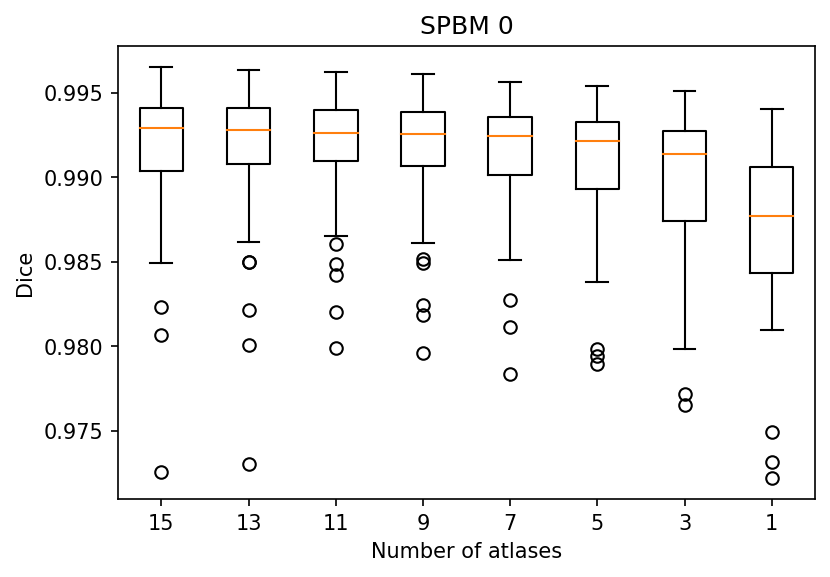

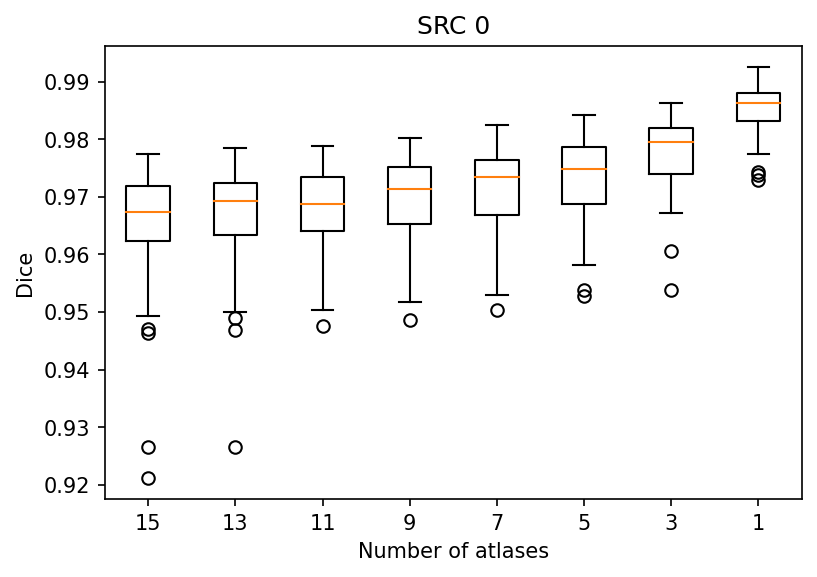

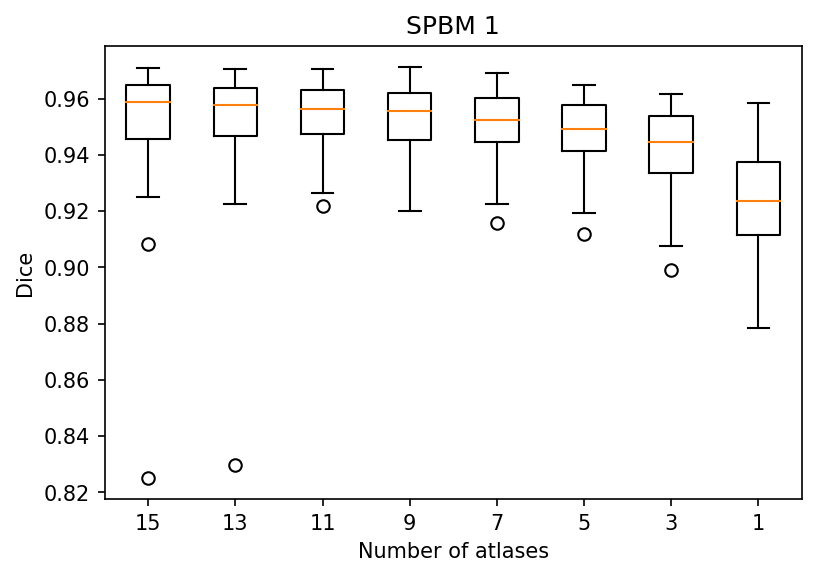

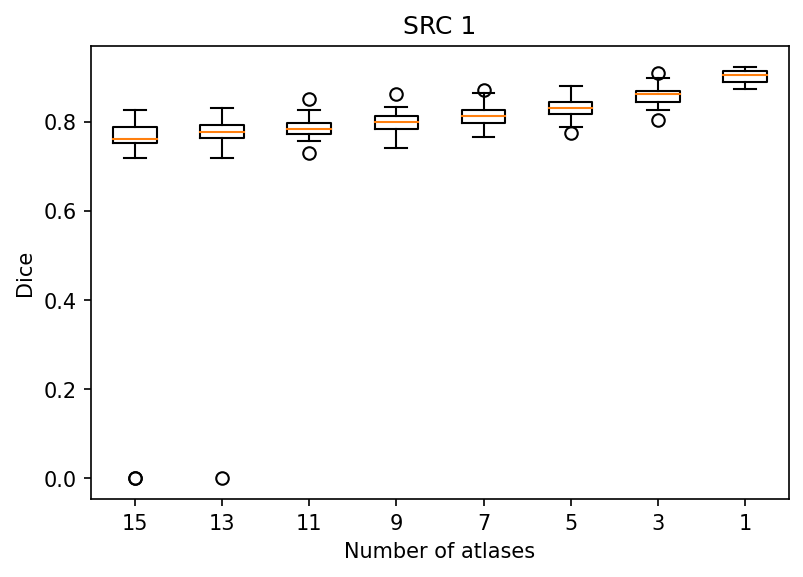

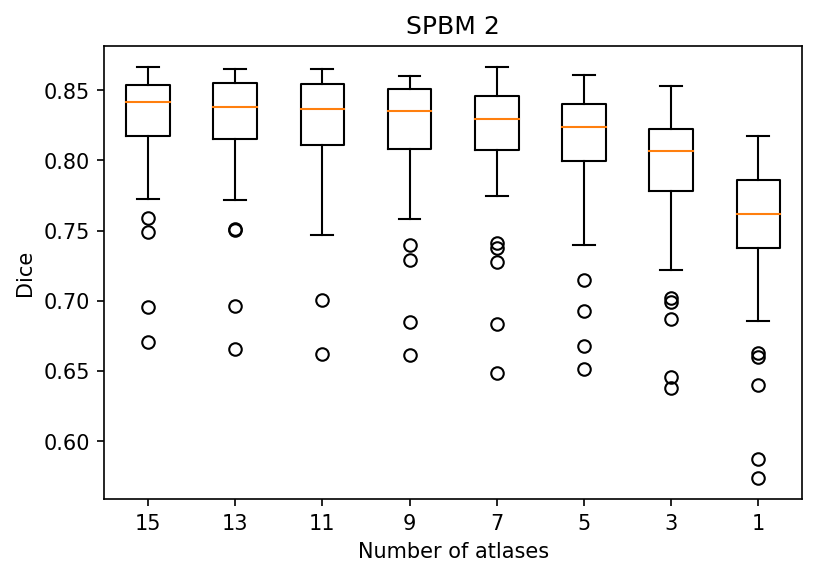

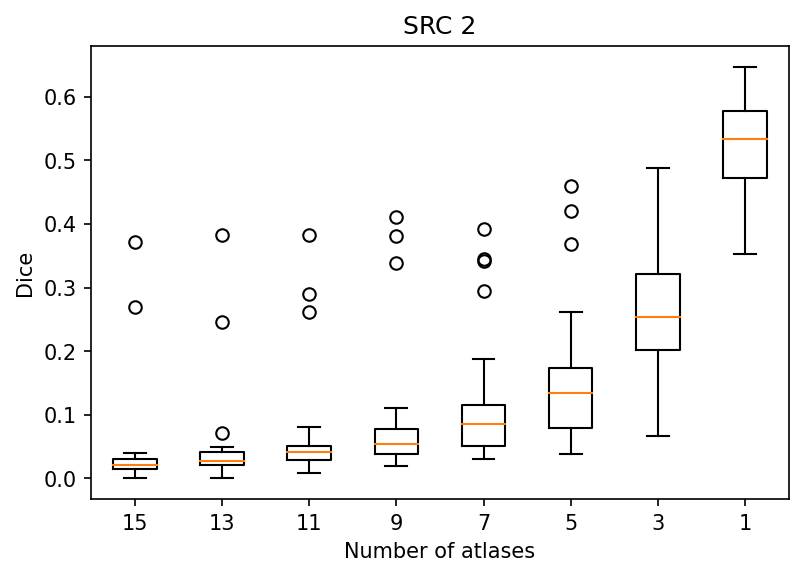

In [14]:

for l in range(numOfLabels):
    plt.figure(dpi=150)
    plt.boxplot(dataSPBM[l], labels=xlabels)
    plt.title(f"SPBM {l}")
    plt.xlabel(xlabel)
    plt.ylabel("Dice")
    plt.show()
    
    plt.figure(dpi=150)
    plt.boxplot(dataSRC[l], labels=xlabels)
    plt.title(f"SRC {l}")
    plt.xlabel(xlabel)
    plt.ylabel("Dice")
    plt.show()

In [ ]:

for l in range(numOfLabels):
    plt.figure(dpi=150)
    plt.boxplot(dataSPBM[l], labels=xlabels)
    plt.title(f"SPBM {l}")
    plt.xlabel(xlabel)
    plt.ylabel("Dice")
    plt.show()
    
    plt.figure(dpi=150)
    plt.boxplot(dataSRC[l], labels=xlabels)
    plt.title(f"SRC {l}")
    plt.xlabel(xlabel)
    plt.ylabel("Dice")
    plt.show()

In [ ]:

for l in range(numOfLabels):
    plt.figure(dpi=150)
    plt.boxplot(dataSPBM[l], labels=xlabels)
    plt.title(f"SPBM {l}")
    plt.xlabel(xlabel)
    plt.ylabel("Dice")
    plt.show()
    
    plt.figure(dpi=150)
    plt.boxplot(dataSRC[l], labels=xlabels)
    plt.title(f"SRC {l}")
    plt.xlabel(xlabel)
    plt.ylabel("Dice")
    plt.show()

In [ ]:
# print("atlases", atlases)
print("Ps", Ps)
print("Ns", Ns)
print("lassoTols", lassoTols)

In [15]:
for l in range(len(dataSPBM)):
    for t in range(len(dataSPBM[l])):
        print(l, xlabels[t], ":", np.mean(dataSPBM[l][t]))

0 15 : 0.9912919754737269
0 13 : 0.9913384709067298
0 11 : 0.99162329622905
0 9 : 0.9913833685412617
0 7 : 0.9910640134180776
0 5 : 0.9905606992960232
0 3 : 0.9896317855575134
0 1 : 0.9869370616094391
1 15 : 0.9512808192578319
1 13 : 0.9517509084524822
1 11 : 0.9536705936443169
1 9 : 0.9521469600536959
1 7 : 0.9501565780357087
1 5 : 0.9472743143342042
1 3 : 0.9417745580122302
1 1 : 0.9239501932036297
2 15 : 0.8264436468260088
2 13 : 0.825142027828348
2 11 : 0.8239224361791911
2 9 : 0.8209006372185084
2 7 : 0.8159088969553593
2 5 : 0.8073155335473844
2 3 : 0.7917946147312244
2 1 : 0.7494223855462087


In [11]:
for l in range(len(dataSRC)):
    for t in range(len(dataSRC[l])):
        print(l, xlabels[t], ":", np.mean(dataSRC[l][t]))

0 [9, 9, 9] : 0.9738968296889837
0 [7, 7, 7] : 0.9738118208237884
0 [5, 5, 5] : 0.9734550603075387
0 [3, 3, 3] : 0.9720221811956615
1 [9, 9, 9] : 0.8249997152047766
1 [7, 7, 7] : 0.815800410274047
1 [5, 5, 5] : 0.8160141945020701
1 [3, 3, 3] : 0.815800410274047
2 [9, 9, 9] : 0.19273645122486027
2 [7, 7, 7] : 0.16084898111359044
2 [5, 5, 5] : 0.16061985972324447
2 [3, 3, 3] : 0.15420045293866166


In [ ]:
for l in range(len(dataSPBM)):
    for t in range(len(dataSPBM[l])):
        print(l, xlabels[t], ":", np.mean(dataSPBM[l][t]))